In [ ]:
#Imported Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Imported file with data and loaded the dataframe
df = pd.read_csv('recalls_data.csv')

In [ ]:
#Printing shape, data types, and first 10 rows of data.
print("shape", df.shape)
print(df.dtypes)
print(df.head(10))

In [96]:
#Checking Missing Data In Each Column
print(df.isnull().sum())
#Checking Percentage of Missing Data In Each Column
for cols in df.columns:
    percent_missing = (df[cols].isnull().sum()/df.shape[0])
    print(cols, round(percent_missing, 2))

Report Received Date                            0
NHTSA ID                                        0
Recall Link                                     0
Manufacturer                                    0
Subject                                         0
Component                                       0
Mfr Campaign Number                            47
Recall Type                                     0
Potentially Affected                           41
Recall Description                           2401
Consequence Summary                          4888
Corrective Action                            2388
Park Outside Advisory                           0
Do Not Drive Advisory                           0
Completion Rate % (Blank - Not Reported)    18646
dtype: int64
Report Received Date 0.0
NHTSA ID 0.0
Recall Link 0.0
Manufacturer 0.0
Subject 0.0
Component 0.0
Mfr Campaign Number 0.0
Recall Type 0.0
Potentially Affected 0.0
Recall Description 0.08
Consequence Summary 0.17
Corrective Action 0.08
Par

In [ ]:
#Dropping rows where any value is null across columns.
print(df.shape)
df = df.dropna()
print(df.shape)

count    2.828800e+04
mean     4.577569e+04
std      3.744440e+05
min      0.000000e+00
25%      9.900000e+01
50%      6.890000e+02
75%      6.374000e+03
max      3.200000e+07
Name: Potentially Affected, dtype: float64


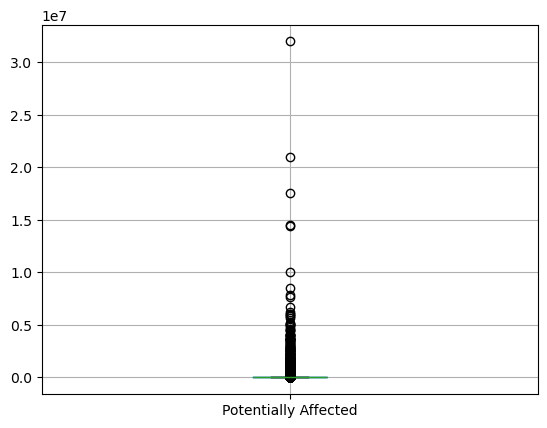

In [106]:
#Checking the column Potentially Affected for outliers.
df.boxplot(column=['Potentially Affected'])
print(df['Potentially Affected'].describe())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('recalls_data.csv')
df_dropna = df.dropna()
print(df_dropna.shape)
df_dropna_selectedColumns = df_dropna[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]
print(df_dropna_selectedColumns.shape)

df_order = df_dropna_selectedColumns["Manufacturer"].value_counts()
print(df_order.head(10))

In [140]:
import pandas as pd

df = pd.read_csv('recalls_data.csv')
df_dropna = df.dropna()
print(df_dropna.shape)
df_dropna_selectedColumns = df_dropna[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]
print(df_dropna_selectedColumns.shape)

df_order = df_dropna_selectedColumns["Component"].value_counts()
print(df_order.head(10))

(9660, 15)
(9660, 5)
Component
EQUIPMENT                    1688
ELECTRICAL SYSTEM            1292
AIR BAGS                      685
STRUCTURE                     542
POWER TRAIN                   530
STEERING                      512
SUSPENSION                    488
EXTERIOR LIGHTING             431
SERVICE BRAKES, HYDRAULIC     350
SEAT BELTS                    319
Name: count, dtype: int64


In [89]:
import pandas as pd
df = pd.read_csv('recalls_data.csv')
df_order = df["Recall Type"].value_counts()
print(df_order.head(10))

(28329, 15)
(28329, 15)
Recall Type
Vehicle       24640
Equipment      2694
Tire            758
Child Seat      237
Name: count, dtype: int64


In [5]:
import pandas as pd

df = pd.read_csv('recalls_data.csv')
df_dropna = df.dropna()
print(df_dropna.shape)
df_dropna_selectedColumns = df_dropna[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]
print(df_dropna_selectedColumns.shape)

print(df_dropna_selectedColumns['Report Received Date'].dtypes)
df_dropna_selectedColumns['Report Received Date']=df_dropna_selectedColumns['Report Received Date'].apply(pd.to_datetime)

print(df_dropna_selectedColumns['Report Received Date'].dtypes)

start_date = '1966-01-19'
end_date = '1999-12-31'
df_before1999 = df_dropna_selectedColumns.loc[(df_dropna_selectedColumns['Report Received Date'] >= start_date) & (df_dropna_selectedColumns['Report Received Date'] <= end_date)]

start_date2 = '2000-01-01'
end_date2 = '2024-09-13'
df_after1999 = df_dropna_selectedColumns.loc[(df_dropna_selectedColumns['Report Received Date'] >= start_date2) & (df_dropna_selectedColumns['Report Received Date'] <= end_date2)]

print(df_before1999.shape)
print(df_after1999.shape)

(9660, 15)
(9660, 5)
object
datetime64[ns]
(0, 5)
(9660, 5)


C:\Users\vince\AppData\Local\Temp\ipykernel_14672\2823887663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna_selectedColumns['Report Received Date']=df_dropna_selectedColumns['Report Received Date'].apply(pd.to_datetime)


In [52]:
import pandas as pd

df = pd.read_csv('recalls_data.csv')
df_dropna = df.dropna()
df_dropna_selectedColumns = df_dropna[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]

df_pivot = df_dropna_selectedColumns.pivot_table(index='Manufacturer', values='Recall Type', aggfunc='count')
print(df_pivot.sort_values)

<bound method DataFrame.sort_values of                                    Recall Type
Manufacturer                                  
1888653 Ontario Inc                          1
3M Transportation Safety Division            1
4-Star Trailers, Inc.                        2
A&J Vans Inc                                 1
A&M Systems, Inc.                            1
...                                        ...
Zero Motorcycles Inc.                       14
Zhaoqing Junhong Co., Ltd.                   2
Ziamatic Corp                                1
e-ride Industries                            1
xperion E&E USA LLC                          1

[917 rows x 1 columns]>


In [26]:
import pandas as pd

df = pd.read_csv('recalls_data.csv')
print(df.columns)

Index(['Report Received Date', 'NHTSA ID', 'Recall Link', 'Manufacturer',
       'Subject', 'Component', 'Mfr Campaign Number', 'Recall Type',
       'Potentially Affected', 'Recall Description', 'Consequence Summary',
       'Corrective Action', 'Park Outside Advisory ', 'Do Not Drive Advisory',
       'Completion Rate % (Blank - Not Reported)'],
      dtype='object')


C:\Users\vince\AppData\Local\Temp\ipykernel_14672\3127500224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selectedColumns['Report Received Date']=df_selectedColumns['Report Received Date'].apply(pd.to_datetime)
C:\Users\vince\AppData\Local\Temp\ipykernel_14672\3127500224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selectedColumns['Report Received Date'] = df_selectedColumns['Report Received Date'].dt.year


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

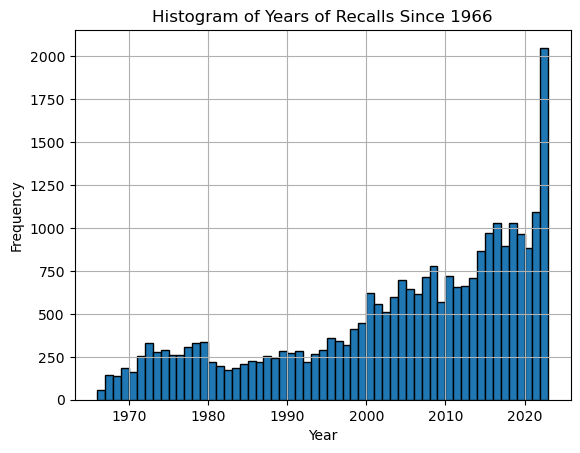

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('recalls_data.csv')
df_selectedColumns = df[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]
df_selectedColumns['Report Received Date']=df_selectedColumns['Report Received Date'].apply(pd.to_datetime)

df_selectedColumns['Report Received Date'] = df_selectedColumns['Report Received Date'].dt.year

df_selectedColumns.hist(column='Report Received Date', bins=range(1966, 2024), edgecolor='black')
plt.title('Histogram of Years of Recalls Since 1966')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.axvline((df_selectedColumns['Report Received Date'] == '1999'), color='red', linestyle='dashed', linewidth=1)

plt.show()